# 图像的基础操作
## 目标
- 获取像素值并修改
- 获取图像的属性（信息）
- 图像的 ROI（）
- 图像通道的拆分及合并
- 几乎所有这些操作与 Numpy 的关系都比与 OpenCV 的关系更加紧密，因此熟练 Numpy 可以帮助我们写出性能更好的代码。（示例将会在 Python 终端中展示，因为他们大部分都只有一行代码）


## 6.1 获取并修改像素值
首先我们需要读入一幅图像

In [5]:
import numpy as np
import cv2
img = cv2.imread("messi5.jpg")

你可以根据像素的行和列的坐标获取他的像素值。对 BGR 图像而言，返回
值为 B， G， R 的值。对灰度图像而言，会返回他的灰度值（亮度？ intensity）
.

In [6]:
px=img[100,100]
print(px)
blue=img[100,100,0]
print(blue)
## [57 63 68]
## 57

[68 52 35]
68


你可以以类似的方式修改像素值。

In [8]:
import cv2
import numpy as np
img=cv2.imread('messi5.jpg')
img[100,100]=[255,255,255]
print(img[100,100])

[255 255 255]


<table><tr><td bgcolor=green><p algin=left>
警告： Numpy 是经过优化了的进行快速矩阵运算的软件包。所以我们不推荐逐个获取像素值并修改，这样会很慢，能有矩阵运算就不要用循环。</p></td></tr></table>

<table><tr><td bgcolor=green><p algin=left>
注意：上面提到的方法被用来选取矩阵的一个区域，比如说前 5 行的后 3
列。对于获取每一个像素值，也许使用 Numpy 的 array.item() 和 array.itemset() 会更好。但是返回值是标量。如果你想获得所有 B， G， R 的
值，你需要使用 array.item() 分割他们。</p></td></tr></table>

获取像素值及修改的更好方法。

In [9]:
import cv2
import numpy as np
img=cv2.imread('messi5.jpg')
print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))

18
100


# 6.2 获取图像属性
图像的属性包括：行，列，通道，图像数据类型，像素数目等
img.shape 可以获取图像的形状。他的返回值是一个包含行数，列数，
通道数的元组。

In [10]:
print(img.shape)

(435, 346, 3)


 <table><tr><td bgcolor=green><p algin=left>
注意：如果图像是灰度图，返回值仅有行数和列数。所以通过检查这个返回值就可以知道加载的是灰度图还是彩色图。</p></td></tr></table>

img.size 可以返回图像的像素数目

In [11]:
print(img.size)

451530


img.dtype 返回的是图像的数据类型

In [13]:
print(img.dtype)

uint8


注意：在除虫（ debug）时 img.dtype 非常重要。因为在 OpenCVPython 代码中经常出现数据类型的不一致。

## 6.3 图像 ROI
有时你需要对一幅图像的特定区域进行操作。例如我们要检测一副图像中
眼睛的位置，我们首先应该在图像中找到脸，再在脸的区域中找眼睛，而不是
直接在一幅图像中搜索。这样会提高程序的准确性和性能。
ROI 也是使用 Numpy 索引来获得的。现在我们选择球的部分并把他拷贝
到图像的其他区域。

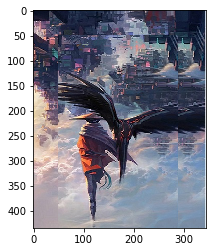

In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
img=cv2.imread('messi5.jpg')
scarecrow = img[50:435,100:340]
img[50:435,50:290] = scarecrow# 稻草人的位置向左移动50个像素
imageRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()


## 6.4 拆分及合并图像通道
有时我们需要对 BGR 三个通道分别进行操作。这是你就需要把 BGR 拆
分成单个通道。有时你需要把独立通道的图片合并成一个 BGR 图像。你可以
这样做：

In [9]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
img=cv2.imread('messi5.jpg')
b,g,r = cv2.split(img)
img = cv2.merge(b,g,r) #合并

TypeError: merge() takes at most 2 arguments (3 given)

或者

In [10]:
b = img[:,:,0]

假如你想使所有像素的红色通道值都为 0，你不必先拆分再赋值。你可以
直接使用 Numpy 索引，这会更快。

In [11]:
img[:,:,2] = 0

<table ><tr><td bgcolor=green><p algin=left>
警告： cv2.split() 是一个比较耗时的操作。只有真正需要时才用它，能用
Numpy 索引就尽量用。</p></td></tr></table>

# 6.5 为图像扩边（填充）
#### 如果你想在图像周围创建一个边，就像相框一样，你可以使用 cv2.copyMakeBorder()函数。这经常在卷积运算或 0 填充时被用到。这个函数包括如下参数：
- src 输入图像
- top, bottom, left, right 对应边界的像素数目。
- borderType 要添加那种类型的边界，类型如下
    - cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（ value）。
    - cv2.BORDER_REFLECT 边界元素的镜像。比如: fedcba|abcdefgh|hgfedcb
    - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba
    - cv2.BORDER_REPLICATE 重复最后一个元素。例如: aaaaaa|abcdefgh|hhhhhhh
    - cv2.BORDER_WRAP 不知道怎么说了, 就像这样: cdefgh|abcdefgh|abcdefg
- value 边界颜色，如果边界的类型是 cv2.BORDER_CONSTANT
#### 为了更好的理解这几种类型请看下面的演示程序。

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE=[255,0,0]
img1=cv2.imread("opencv_logo.png")

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()